# unit 2.0 - learning sequences

In [1]:
# load dataset of names from: https://github.com/karpathy/makemore/blob/master/names.txt
fn = 'names.txt'
names = open(fn, 'r').read().splitlines()
print(names)

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn', 'abigail', 'emily', 'elizabeth', 'mila', 'ella', 'avery', 'sofia', 'camila', 'aria', 'scarlett', 'victoria', 'madison', 'luna', 'grace', 'chloe', 'penelope', 'layla', 'riley', 'zoey', 'nora', 'lily', 'eleanor', 'hannah', 'lillian', 'addison', 'aubrey', 'ellie', 'stella', 'natalie', 'zoe', 'leah', 'hazel', 'violet', 'aurora', 'savannah', 'audrey', 'brooklyn', 'bella', 'claire', 'skylar', 'lucy', 'paisley', 'everly', 'anna', 'caroline', 'nova', 'genesis', 'emilia', 'kennedy', 'samantha', 'maya', 'willow', 'kinsley', 'naomi', 'aaliyah', 'elena', 'sarah', 'ariana', 'allison', 'gabriella', 'alice', 'madelyn', 'cora', 'ruby', 'eva', 'serenity', 'autumn', 'adeline', 'hailey', 'gianna', 'valentina', 'isla', 'eliana', 'quinn', 'nevaeh', 'ivy', 'sadie', 'piper', 'lydia', 'alexa', 'josephine', 'emery', 'julia', 'delilah', 'arianna', 'vivian', 'kaylee', 'sophie', 'brielle', 'madeline', 'peyton', 'ryle

BARD:

from a list of names like : ['Liam', 'Noah',..] convert the list to lowercase in python

In [2]:
def convert_list_to_lowercase(names):
  """Converts a list of names to lowercase.

  Args:
    names: A list of names.

  Returns:
    A list of names in lowercase.
  """

  lowercased_names = []
  for name in names:
    lowercased_names.append(name.lower())

  return lowercased_names

# Create a list of names
# names = ["Liam", "Noah", "Oliver"]

# Convert the list of names to lowercase
names = convert_list_to_lowercase(names)

# Print the list of names in lowercase
print(names)


['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn', 'abigail', 'emily', 'elizabeth', 'mila', 'ella', 'avery', 'sofia', 'camila', 'aria', 'scarlett', 'victoria', 'madison', 'luna', 'grace', 'chloe', 'penelope', 'layla', 'riley', 'zoey', 'nora', 'lily', 'eleanor', 'hannah', 'lillian', 'addison', 'aubrey', 'ellie', 'stella', 'natalie', 'zoe', 'leah', 'hazel', 'violet', 'aurora', 'savannah', 'audrey', 'brooklyn', 'bella', 'claire', 'skylar', 'lucy', 'paisley', 'everly', 'anna', 'caroline', 'nova', 'genesis', 'emilia', 'kennedy', 'samantha', 'maya', 'willow', 'kinsley', 'naomi', 'aaliyah', 'elena', 'sarah', 'ariana', 'allison', 'gabriella', 'alice', 'madelyn', 'cora', 'ruby', 'eva', 'serenity', 'autumn', 'adeline', 'hailey', 'gianna', 'valentina', 'isla', 'eliana', 'quinn', 'nevaeh', 'ivy', 'sadie', 'piper', 'lydia', 'alexa', 'josephine', 'emery', 'julia', 'delilah', 'arianna', 'vivian', 'kaylee', 'sophie', 'brielle', 'madeline', 'peyton', 'ryle

CODE from: https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part1_bigrams.ipynb

We use it here to plot the characters biagrams (couples of chars)

In [3]:
# from : https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part1_bigrams.ipynb

import torch

words = names

N = torch.zeros((27, 27), dtype=torch.int32)

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

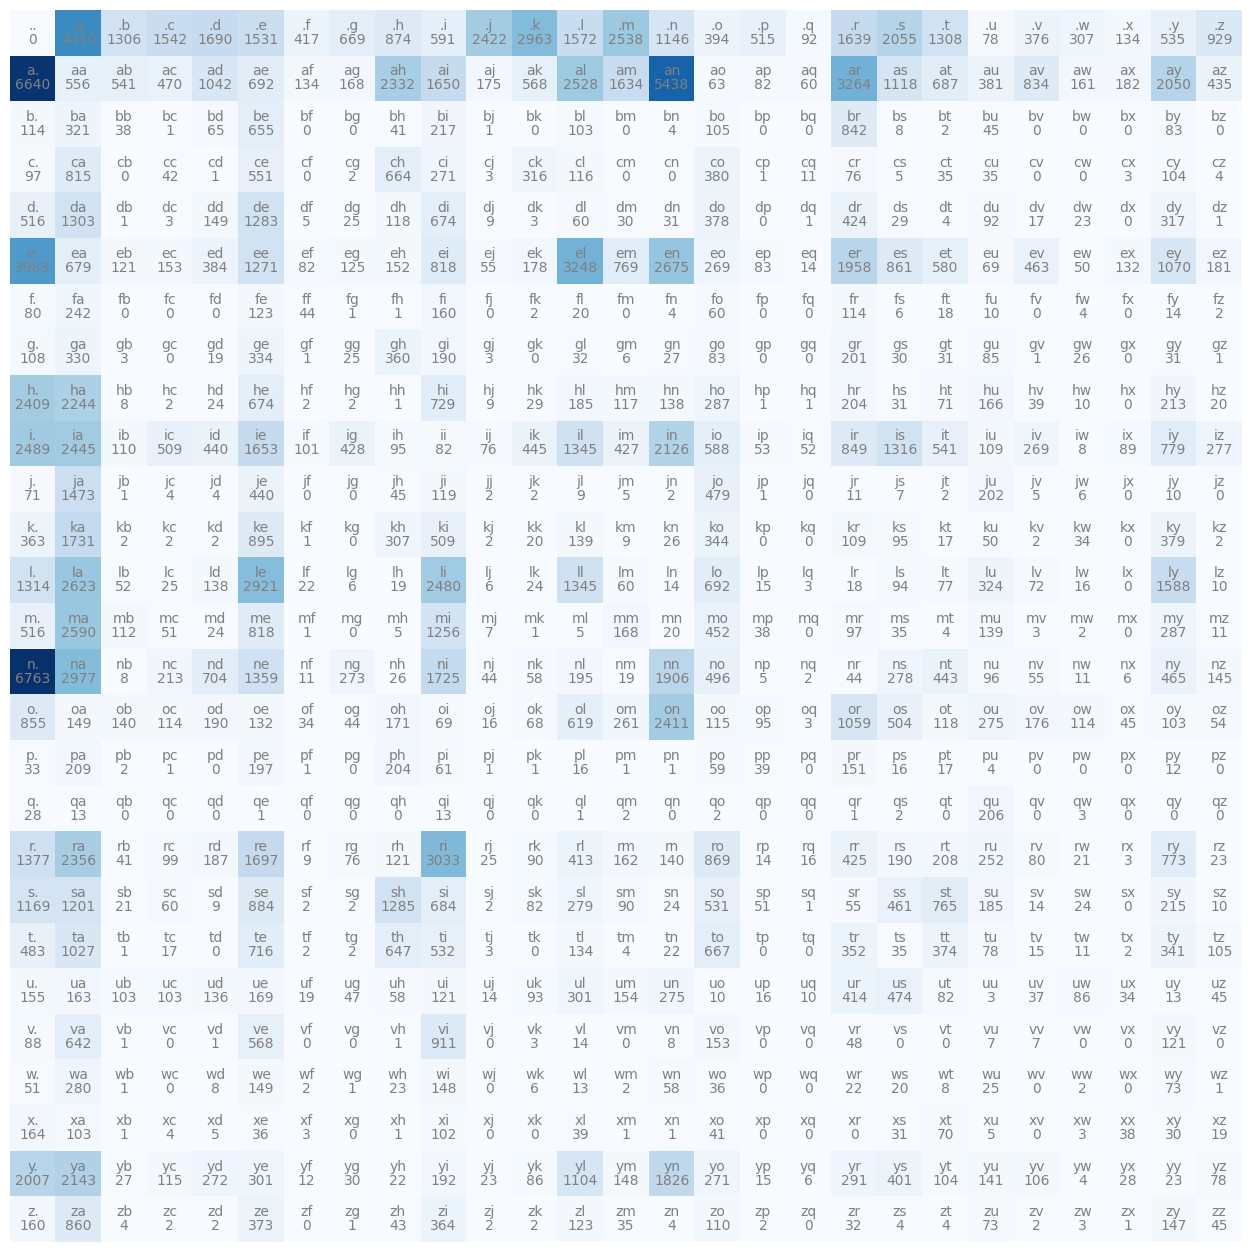

In [4]:
# from : https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part1_bigrams.ipynb

# plot

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        # print(i,j)
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

BARD:

convert the list of couples of characters: ['li', 'ia', 'am', 'm.', 'no', 'ah', 'h.', 'ol', 'li', 'iv', 've', 'er'] to a 2d tensor in PyTorch with 1st dimension being the index of the first character in the couple and the second dimension the second character in the couple. Subtract the index of ‘a’ from the characters.

In [5]:
def add_dot_at_the_end_of_each_name(names):
  """Adds a "." at the end of each name in a list of names.

  Args:
    names: A list of names.

  Returns:
    A list of names with a "." at the end of each name.
  """

  names_with_dot = []
  for name in names:
    names_with_dot.append("." + name + ".")

  return names_with_dot

def create_couples_of_characters(names):
  """Creates a Python list of couples of characters following each other from a list of names.

  Args:
    names: A list of names.

  Returns:
    A list of couples of characters following each other.
  """

  couples_of_characters = []
  for name in names:
    for i in range(len(name) - 1):
      couple_of_characters = name[i] + name[i + 1]
      couples_of_characters.append(couple_of_characters)

  return couples_of_characters

# Create a list of names
# names = ["Liam", "Noah", "Oliver"]

# Add a "." at the end of each name in the list of names
names_with_dot = add_dot_at_the_end_of_each_name(names)

# Create a Python list of couples of characters following each other
couples_of_characters = create_couples_of_characters(names_with_dot)

# Print the list of couples of characters
print(couples_of_characters)


['.e', 'em', 'mm', 'ma', 'a.', '.o', 'ol', 'li', 'iv', 'vi', 'ia', 'a.', '.a', 'av', 'va', 'a.', '.i', 'is', 'sa', 'ab', 'be', 'el', 'll', 'la', 'a.', '.s', 'so', 'op', 'ph', 'hi', 'ia', 'a.', '.c', 'ch', 'ha', 'ar', 'rl', 'lo', 'ot', 'tt', 'te', 'e.', '.m', 'mi', 'ia', 'a.', '.a', 'am', 'me', 'el', 'li', 'ia', 'a.', '.h', 'ha', 'ar', 'rp', 'pe', 'er', 'r.', '.e', 'ev', 've', 'el', 'ly', 'yn', 'n.', '.a', 'ab', 'bi', 'ig', 'ga', 'ai', 'il', 'l.', '.e', 'em', 'mi', 'il', 'ly', 'y.', '.e', 'el', 'li', 'iz', 'za', 'ab', 'be', 'et', 'th', 'h.', '.m', 'mi', 'il', 'la', 'a.', '.e', 'el', 'll', 'la', 'a.', '.a', 'av', 've', 'er', 'ry', 'y.', '.s', 'so', 'of', 'fi', 'ia', 'a.', '.c', 'ca', 'am', 'mi', 'il', 'la', 'a.', '.a', 'ar', 'ri', 'ia', 'a.', '.s', 'sc', 'ca', 'ar', 'rl', 'le', 'et', 'tt', 't.', '.v', 'vi', 'ic', 'ct', 'to', 'or', 'ri', 'ia', 'a.', '.m', 'ma', 'ad', 'di', 'is', 'so', 'on', 'n.', '.l', 'lu', 'un', 'na', 'a.', '.g', 'gr', 'ra', 'ac', 'ce', 'e.', '.c', 'ch', 'hl', 'lo', 'oe


BARD:

convert the list of couples of characters: ['li', 'ia', 'am', 'm.', 'no', 'ah', 'h.', 'ol', 'li', 'iv', 've', 'er'] to a 2d tensor in PyTorch with 1st dimension being the index of the first character in the couple and the second dimension the second character in the couple. Subtract the index of ‘a’ from the characters.

In [6]:
import torch

def to_2d_tensor(couples):
  """Converts a list of couples of characters to a 2D tensor in PyTorch.

  Args:
    couples: A list of couples of characters.

  Returns:
    A 2D tensor in PyTorch with the 1st dimension being the index of the first
    character in the couple and the second dimension the second character in the
    couple.
  """

  tensor = torch.zeros((len(couples), 2), dtype=torch.long)
  for i, couple in enumerate(couples):
    tensor[i, 0] = ord(couple[0]) - ord('a')
    if couple[0] == '.': tensor [i,0] = 0
    tensor[i, 1] = ord(couple[1]) - ord('a')
    if couple[1] == '.': tensor [i,1] = 0
  return tensor

# Convert the list of couples of characters to a 2D tensor in PyTorch.
tensor = to_2d_tensor(couples_of_characters)

# Print the tensor.
print(tensor)


tensor([[ 0,  4],
        [ 4, 12],
        [12, 12],
        ...,
        [24, 25],
        [25, 23],
        [23,  0]])


PROBLEM: '.' index should be 0: adding manually above!


In [7]:
tensor_in = tensor[:,0] # NOTE LIMITING samples to run faster!
tensor_target = tensor[:,1] # NOTE LIMITING samples to run faster!
print(tensor_in[:10])
print(tensor_target[:10])

tensor([ 0,  4, 12, 12,  0,  0, 14, 11,  8, 21])
tensor([ 4, 12, 12,  0,  0, 14, 11,  8, 21,  8])


BARD:

Create a neural network that predicts a 1D output tensor from a 1D input tensor, using batches of 16 numbers. The tensors look like:
tensor([ 4, 12, 12,  0, 14, 11,  8, 21,  8,  0])
tensor([12, 12,  0,  0, 11,  8, 21,  8,  0,  0])

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class myDataset(torch.utils.data.Dataset):
    def __init__(self, array, labels):
        self.array = array
        self.labels = labels

    def __len__(self):
        return len(self.array)

    def __getitem__(self, idx):
        data = self.array[idx]
        labels = F.one_hot(self.labels[idx], num_classes=27).float()
        return data, labels


class myNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.embedding = nn.Embedding(27, 128)
        self.hidden = nn.Linear(128, 128)
        self.output = nn.Linear(128, 27)

    def forward(self, x):
        x = F.relu(self.embedding(x))
        x = F.relu(self.hidden(x))
        x = self.output(x)
        return x

# Create the predictor model
model = myNet()

# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Create the data loader
train_dataset = myDataset(tensor_in, tensor_target)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=0)
print(train_loader)

In [9]:
# Train the model
num_epochs = 10
with torch.set_grad_enabled(True):
  for epoch in range(num_epochs):
    r_loss = 0
    for x,yt in train_loader:
        # print(x,yt)
        y_pred = model(x)
        loss = loss_fn(y_pred, yt)
        r_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch %1 == 0 or epoch == num_epochs:
      r_loss = r_loss / (tensor_in.size(0))
      print('Loss at epoch:', epoch,' - ', r_loss)

Loss at epoch: 0  -  0.14798079984777246
Loss at epoch: 1  -  0.14711963926464722
Loss at epoch: 2  -  0.14697171280231133
Loss at epoch: 3  -  0.14687553350068086
Loss at epoch: 4  -  0.14678343459635268
Loss at epoch: 5  -  0.14675830544626012
Loss at epoch: 6  -  0.14675604840882375
Loss at epoch: 7  -  0.14672237700599974
Loss at epoch: 8  -  0.14667860242438527
Loss at epoch: 9  -  0.14663014487126366


BARD:
write test code for this neural network, to generate 5 examples


In [10]:
# from: https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part1_bigrams.ipynb
# sample from the model
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
  out = []
  # ix = torch.randint(27,(1,))
  ix = torch.Tensor([0]).long()
  while(True):
    with torch.no_grad():
      logits = model(ix)

    probs = F.softmax(logits, dim=1)
    oc = torch.multinomial(probs, num_samples=1, generator=g).item()
    out.append(itos[oc])
    if oc == 0:
      break
  print(''.join(out))

cqxbm.
mjglkurkimq.
k.
xhkmmmjimj.
maimrlkgdk.
kk.
.
.
.
r.


Take note of the value of the loss: hovers around 1.46
we will compare this to more sophisticated algorithms in the next lectures!

Also note the names produced are not really good... work to be done!